# Modelling

In [1]:
import numpy as np

data = np.load("colposcopy_lstm_data.npz")

X_train_lstm = data["X_train_lstm"]
y_train      = data["y_train"]        
y_train_enc  = data["y_train_enc"]
X_test_lstm  = data["X_test_lstm"]
y_test       = data["y_test"]
y_test_enc   = data["y_test_enc"]

print("y_train shape:", y_train.shape)
print("unique labels:", np.unique(y_train))

y_train shape: (99,)
unique labels: ['0' '1' '2' '3' '4' '5']


## Balancing Data

In [2]:
from sklearn.utils.class_weight import compute_class_weight

y_train = y_train.astype(int)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(6),   
    y=y_train
)

class_weight_dict = {i: w for i, w in enumerate(class_weights)}

print("Class Weights:")
for k, v in class_weight_dict.items():
    print(f"Class {k} : {v:.4f}")

Class Weights:
Class 0 : 2.3571
Class 1 : 1.3750
Class 2 : 1.6500
Class 3 : 0.6875
Class 4 : 0.9167
Class 5 : 0.5893


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    LSTM(
        units=64,
        input_shape=(180, 1),
        return_sequences=False
    ),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(6, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 64)                16896     


 dropout (Dropout)           (None, 64)                0         


 dense (Dense)               (None, 32)                2080      


 dropout_1 (Dropout)         (None, 32)                0         


 dense_1 (Dense)             (None, 6)                 198       


Total params: 19,174


Trainable params: 19,174


Non-trainable params: 0


_________________________________________________________________


## Trainning

In [4]:
history = model.fit(
    X_train_lstm,
    y_train_enc,
    epochs=50,
    batch_size=16,
    validation_split=0.2,  
    class_weight=class_weight_dict,
    verbose=1
)


Epoch 1/50


1/5 [=====>........................] - ETA: 7s - loss: 1.9734 - accuracy: 0.1250

2/5 [===========>..................] - ETA: 0s - loss: 1.9878 - accuracy: 0.1250

3/5 [=================>............] - ETA: 0s - loss: 2.0206 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 2.0133 - accuracy: 0.2188

5/5 [==============================] - ETA: 0s - loss: 1.9649 - accuracy: 0.2025

5/5 [==============================] - 3s 191ms/step - loss: 1.9649 - accuracy: 0.2025 - val_loss: 1.9332 - val_accuracy: 0.0000e+00


Epoch 2/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9373 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.9259 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 2.0110 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.9754 - accuracy: 0.1719

5/5 [==============================] - ETA: 0s - loss: 1.9668 - accuracy: 0.1646

5/5 [==============================] - 0s 82ms/step - loss: 1.9668 - accuracy: 0.1646 - val_loss: 2.0309 - val_accuracy: 0.0000e+00


Epoch 3/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8695 - accuracy: 0.0000e+00

2/5 [===========>..................] - ETA: 0s - loss: 1.9049 - accuracy: 0.1250    

3/5 [=================>............] - ETA: 0s - loss: 1.9491 - accuracy: 0.1042

4/5 [=======================>......] - ETA: 0s - loss: 1.9942 - accuracy: 0.1406

5/5 [==============================] - ETA: 0s - loss: 1.9574 - accuracy: 0.1519

5/5 [==============================] - 0s 76ms/step - loss: 1.9574 - accuracy: 0.1519 - val_loss: 2.1065 - val_accuracy: 0.0000e+00


Epoch 4/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6963 - accuracy: 0.0000e+00

2/5 [===========>..................] - ETA: 0s - loss: 1.8443 - accuracy: 0.1250    

3/5 [=================>............] - ETA: 0s - loss: 1.8730 - accuracy: 0.1250

4/5 [=======================>......] - ETA: 0s - loss: 1.9305 - accuracy: 0.1250

5/5 [==============================] - ETA: 0s - loss: 1.9461 - accuracy: 0.1139

5/5 [==============================] - 0s 75ms/step - loss: 1.9461 - accuracy: 0.1139 - val_loss: 2.1806 - val_accuracy: 0.0000e+00


Epoch 5/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7840 - accuracy: 0.1250

2/5 [===========>..................] - ETA: 0s - loss: 1.8690 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.9303 - accuracy: 0.1042

4/5 [=======================>......] - ETA: 0s - loss: 1.9539 - accuracy: 0.0781

5/5 [==============================] - ETA: 0s - loss: 1.9436 - accuracy: 0.1266

5/5 [==============================] - 0s 78ms/step - loss: 1.9436 - accuracy: 0.1266 - val_loss: 2.2671 - val_accuracy: 0.0000e+00


Epoch 6/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7861 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.8581 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.7977 - accuracy: 0.1250

4/5 [=======================>......] - ETA: 0s - loss: 1.8829 - accuracy: 0.1406

5/5 [==============================] - ETA: 0s - loss: 1.9360 - accuracy: 0.1646

5/5 [==============================] - 0s 78ms/step - loss: 1.9360 - accuracy: 0.1646 - val_loss: 2.3586 - val_accuracy: 0.0000e+00


Epoch 7/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9333 - accuracy: 0.0000e+00

2/5 [===========>..................] - ETA: 0s - loss: 1.8859 - accuracy: 0.1562    

3/5 [=================>............] - ETA: 0s - loss: 1.8669 - accuracy: 0.1667

4/5 [=======================>......] - ETA: 0s - loss: 1.9596 - accuracy: 0.1406

5/5 [==============================] - ETA: 0s - loss: 1.9368 - accuracy: 0.1266

5/5 [==============================] - 0s 83ms/step - loss: 1.9368 - accuracy: 0.1266 - val_loss: 2.4708 - val_accuracy: 0.0000e+00


Epoch 8/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9912 - accuracy: 0.0625

2/5 [===========>..................] - ETA: 0s - loss: 2.0080 - accuracy: 0.1250

3/5 [=================>............] - ETA: 0s - loss: 1.9001 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.9159 - accuracy: 0.1406

5/5 [==============================] - ETA: 0s - loss: 1.9644 - accuracy: 0.1139

5/5 [==============================] - 0s 76ms/step - loss: 1.9644 - accuracy: 0.1139 - val_loss: 2.4798 - val_accuracy: 0.0000e+00


Epoch 9/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6172 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.9730 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.9396 - accuracy: 0.1458

4/5 [=======================>......] - ETA: 0s - loss: 1.9835 - accuracy: 0.1562

5/5 [==============================] - ETA: 0s - loss: 1.9447 - accuracy: 0.1519

5/5 [==============================] - 0s 74ms/step - loss: 1.9447 - accuracy: 0.1519 - val_loss: 2.4456 - val_accuracy: 0.0000e+00


Epoch 10/50


1/5 [=====>........................] - ETA: 0s - loss: 2.1866 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 2.0307 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.9761 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.8737 - accuracy: 0.2031

5/5 [==============================] - ETA: 0s - loss: 1.9300 - accuracy: 0.1899

5/5 [==============================] - 0s 71ms/step - loss: 1.9300 - accuracy: 0.1899 - val_loss: 2.3992 - val_accuracy: 0.0000e+00


Epoch 11/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8815 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 2.0421 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.9357 - accuracy: 0.1250

4/5 [=======================>......] - ETA: 0s - loss: 1.9311 - accuracy: 0.1562

5/5 [==============================] - ETA: 0s - loss: 1.9349 - accuracy: 0.1519

5/5 [==============================] - 0s 74ms/step - loss: 1.9349 - accuracy: 0.1519 - val_loss: 2.3800 - val_accuracy: 0.0000e+00


Epoch 12/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9683 - accuracy: 0.0625

2/5 [===========>..................] - ETA: 0s - loss: 1.8406 - accuracy: 0.0938

3/5 [=================>............] - ETA: 0s - loss: 1.9428 - accuracy: 0.1667

4/5 [=======================>......] - ETA: 0s - loss: 1.9718 - accuracy: 0.1562

5/5 [==============================] - ETA: 0s - loss: 1.9503 - accuracy: 0.1646

5/5 [==============================] - 0s 73ms/step - loss: 1.9503 - accuracy: 0.1646 - val_loss: 2.3664 - val_accuracy: 0.0000e+00


Epoch 13/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8416 - accuracy: 0.5000

2/5 [===========>..................] - ETA: 0s - loss: 1.9876 - accuracy: 0.4375

3/5 [=================>............] - ETA: 0s - loss: 1.9115 - accuracy: 0.3333

4/5 [=======================>......] - ETA: 0s - loss: 1.9119 - accuracy: 0.2656

5/5 [==============================] - ETA: 0s - loss: 1.9389 - accuracy: 0.2532

5/5 [==============================] - 0s 71ms/step - loss: 1.9389 - accuracy: 0.2532 - val_loss: 2.4110 - val_accuracy: 0.0000e+00


Epoch 14/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8587 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.8435 - accuracy: 0.1250

3/5 [=================>............] - ETA: 0s - loss: 1.9058 - accuracy: 0.1458

4/5 [=======================>......] - ETA: 0s - loss: 1.9368 - accuracy: 0.1719

5/5 [==============================] - ETA: 0s - loss: 1.9225 - accuracy: 0.1646

5/5 [==============================] - 0s 77ms/step - loss: 1.9225 - accuracy: 0.1646 - val_loss: 2.4132 - val_accuracy: 0.0000e+00


Epoch 15/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6620 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.8200 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.8575 - accuracy: 0.1458

4/5 [=======================>......] - ETA: 0s - loss: 1.8931 - accuracy: 0.1875

5/5 [==============================] - ETA: 0s - loss: 1.9256 - accuracy: 0.1772

5/5 [==============================] - 0s 74ms/step - loss: 1.9256 - accuracy: 0.1772 - val_loss: 2.4511 - val_accuracy: 0.0000e+00


Epoch 16/50


1/5 [=====>........................] - ETA: 0s - loss: 1.8637 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.8314 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 1.8411 - accuracy: 0.1667

4/5 [=======================>......] - ETA: 0s - loss: 1.9018 - accuracy: 0.1719

5/5 [==============================] - ETA: 0s - loss: 1.9191 - accuracy: 0.1646

5/5 [==============================] - 0s 72ms/step - loss: 1.9191 - accuracy: 0.1646 - val_loss: 2.4988 - val_accuracy: 0.0000e+00


Epoch 17/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9887 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 2.1094 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.9929 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.8800 - accuracy: 0.2031

5/5 [==============================] - ETA: 0s - loss: 1.9181 - accuracy: 0.1899

5/5 [==============================] - 0s 73ms/step - loss: 1.9181 - accuracy: 0.1899 - val_loss: 2.5516 - val_accuracy: 0.0000e+00


Epoch 18/50


1/5 [=====>........................] - ETA: 0s - loss: 2.0900 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.8751 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.9385 - accuracy: 0.1458

4/5 [=======================>......] - ETA: 0s - loss: 1.8791 - accuracy: 0.1562

5/5 [==============================] - ETA: 0s - loss: 1.9145 - accuracy: 0.1646

5/5 [==============================] - 0s 72ms/step - loss: 1.9145 - accuracy: 0.1646 - val_loss: 2.6479 - val_accuracy: 0.0000e+00


Epoch 19/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7632 - accuracy: 0.0625

2/5 [===========>..................] - ETA: 0s - loss: 1.7856 - accuracy: 0.1250

3/5 [=================>............] - ETA: 0s - loss: 1.8756 - accuracy: 0.1042

4/5 [=======================>......] - ETA: 0s - loss: 1.8358 - accuracy: 0.1562

5/5 [==============================] - ETA: 0s - loss: 1.9302 - accuracy: 0.1519

5/5 [==============================] - 0s 74ms/step - loss: 1.9302 - accuracy: 0.1519 - val_loss: 2.6750 - val_accuracy: 0.0000e+00


Epoch 20/50


1/5 [=====>........................] - ETA: 0s - loss: 1.4068 - accuracy: 0.1250

2/5 [===========>..................] - ETA: 0s - loss: 1.7522 - accuracy: 0.0938

3/5 [=================>............] - ETA: 0s - loss: 1.8547 - accuracy: 0.1250

4/5 [=======================>......] - ETA: 0s - loss: 1.8913 - accuracy: 0.1094

5/5 [==============================] - ETA: 0s - loss: 1.9152 - accuracy: 0.1139

5/5 [==============================] - 0s 80ms/step - loss: 1.9152 - accuracy: 0.1139 - val_loss: 2.6470 - val_accuracy: 0.0000e+00


Epoch 21/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9139 - accuracy: 0.0000e+00

2/5 [===========>..................] - ETA: 0s - loss: 1.7880 - accuracy: 0.1875    

3/5 [=================>............] - ETA: 0s - loss: 1.8534 - accuracy: 0.1667

4/5 [=======================>......] - ETA: 0s - loss: 1.8966 - accuracy: 0.1719

5/5 [==============================] - ETA: 0s - loss: 1.9103 - accuracy: 0.1519

5/5 [==============================] - 0s 71ms/step - loss: 1.9103 - accuracy: 0.1519 - val_loss: 2.6653 - val_accuracy: 0.0000e+00


Epoch 22/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7805 - accuracy: 0.0000e+00

2/5 [===========>..................] - ETA: 0s - loss: 1.9357 - accuracy: 0.0938    

3/5 [=================>............] - ETA: 0s - loss: 2.0162 - accuracy: 0.1250

4/5 [=======================>......] - ETA: 0s - loss: 1.9201 - accuracy: 0.1094

5/5 [==============================] - ETA: 0s - loss: 1.9340 - accuracy: 0.1392

5/5 [==============================] - 0s 75ms/step - loss: 1.9340 - accuracy: 0.1392 - val_loss: 2.6005 - val_accuracy: 0.0000e+00


Epoch 23/50


1/5 [=====>........................] - ETA: 0s - loss: 2.0387 - accuracy: 0.0000e+00

2/5 [===========>..................] - ETA: 0s - loss: 1.9537 - accuracy: 0.2812    

3/5 [=================>............] - ETA: 0s - loss: 1.9678 - accuracy: 0.2500

4/5 [=======================>......] - ETA: 0s - loss: 1.9359 - accuracy: 0.2344

5/5 [==============================] - ETA: 0s - loss: 1.9235 - accuracy: 0.2278

5/5 [==============================] - 0s 73ms/step - loss: 1.9235 - accuracy: 0.2278 - val_loss: 2.5638 - val_accuracy: 0.0000e+00


Epoch 24/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6010 - accuracy: 0.3125

2/5 [===========>..................] - ETA: 0s - loss: 1.6393 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 1.7448 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.8864 - accuracy: 0.2031

5/5 [==============================] - ETA: 0s - loss: 1.8854 - accuracy: 0.1646

5/5 [==============================] - 0s 76ms/step - loss: 1.8854 - accuracy: 0.1646 - val_loss: 2.5766 - val_accuracy: 0.0000e+00


Epoch 25/50


1/5 [=====>........................] - ETA: 0s - loss: 1.4841 - accuracy: 0.4375

2/5 [===========>..................] - ETA: 0s - loss: 2.0196 - accuracy: 0.2500

3/5 [=================>............] - ETA: 0s - loss: 1.9718 - accuracy: 0.2292

4/5 [=======================>......] - ETA: 0s - loss: 1.9076 - accuracy: 0.2188

5/5 [==============================] - ETA: 0s - loss: 1.9154 - accuracy: 0.2152

5/5 [==============================] - 0s 75ms/step - loss: 1.9154 - accuracy: 0.2152 - val_loss: 2.5988 - val_accuracy: 0.0000e+00


Epoch 26/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7936 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.8234 - accuracy: 0.2500

3/5 [=================>............] - ETA: 0s - loss: 1.8578 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.8890 - accuracy: 0.1875

5/5 [==============================] - ETA: 0s - loss: 1.9162 - accuracy: 0.2152

5/5 [==============================] - 0s 74ms/step - loss: 1.9162 - accuracy: 0.2152 - val_loss: 2.6114 - val_accuracy: 0.0000e+00


Epoch 27/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7525 - accuracy: 0.1250

2/5 [===========>..................] - ETA: 0s - loss: 1.7477 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.8197 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.8455 - accuracy: 0.1875

5/5 [==============================] - ETA: 0s - loss: 1.8897 - accuracy: 0.1899

5/5 [==============================] - 0s 72ms/step - loss: 1.8897 - accuracy: 0.1899 - val_loss: 2.6913 - val_accuracy: 0.0000e+00


Epoch 28/50


1/5 [=====>........................] - ETA: 0s - loss: 1.5443 - accuracy: 0.4375

2/5 [===========>..................] - ETA: 0s - loss: 1.6408 - accuracy: 0.3750

3/5 [=================>............] - ETA: 0s - loss: 1.8813 - accuracy: 0.3333

4/5 [=======================>......] - ETA: 0s - loss: 1.8563 - accuracy: 0.2969

5/5 [==============================] - ETA: 0s - loss: 1.9012 - accuracy: 0.2658

5/5 [==============================] - 0s 72ms/step - loss: 1.9012 - accuracy: 0.2658 - val_loss: 2.7283 - val_accuracy: 0.0000e+00


Epoch 29/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6579 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.9144 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 1.8449 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.9070 - accuracy: 0.2344

5/5 [==============================] - ETA: 0s - loss: 1.8776 - accuracy: 0.2025

5/5 [==============================] - 0s 71ms/step - loss: 1.8776 - accuracy: 0.2025 - val_loss: 2.7202 - val_accuracy: 0.0000e+00


Epoch 30/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9290 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.8479 - accuracy: 0.2500

3/5 [=================>............] - ETA: 0s - loss: 1.8099 - accuracy: 0.2708

4/5 [=======================>......] - ETA: 0s - loss: 1.8331 - accuracy: 0.2500

5/5 [==============================] - ETA: 0s - loss: 1.8728 - accuracy: 0.2405

5/5 [==============================] - 0s 71ms/step - loss: 1.8728 - accuracy: 0.2405 - val_loss: 2.7079 - val_accuracy: 0.0000e+00


Epoch 31/50


1/5 [=====>........................] - ETA: 0s - loss: 2.1305 - accuracy: 0.0625

2/5 [===========>..................] - ETA: 0s - loss: 2.0274 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 1.9120 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.8531 - accuracy: 0.2031

5/5 [==============================] - ETA: 0s - loss: 1.8414 - accuracy: 0.1899

5/5 [==============================] - 0s 76ms/step - loss: 1.8414 - accuracy: 0.1899 - val_loss: 2.9381 - val_accuracy: 0.0000e+00


Epoch 32/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6295 - accuracy: 0.1250

2/5 [===========>..................] - ETA: 0s - loss: 1.7365 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.8081 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.8902 - accuracy: 0.2344

5/5 [==============================] - ETA: 0s - loss: 1.8813 - accuracy: 0.2405

5/5 [==============================] - 0s 77ms/step - loss: 1.8813 - accuracy: 0.2405 - val_loss: 2.7889 - val_accuracy: 0.0000e+00


Epoch 33/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9763 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.9813 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 1.9081 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.8471 - accuracy: 0.2344

5/5 [==============================] - ETA: 0s - loss: 1.8694 - accuracy: 0.2405

5/5 [==============================] - 0s 74ms/step - loss: 1.8694 - accuracy: 0.2405 - val_loss: 2.7877 - val_accuracy: 0.0000e+00


Epoch 34/50


1/5 [=====>........................] - ETA: 0s - loss: 2.0855 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.7843 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 1.7936 - accuracy: 0.1458

4/5 [=======================>......] - ETA: 0s - loss: 1.9126 - accuracy: 0.1875

5/5 [==============================] - ETA: 0s - loss: 1.8789 - accuracy: 0.2025

5/5 [==============================] - 0s 72ms/step - loss: 1.8789 - accuracy: 0.2025 - val_loss: 2.8714 - val_accuracy: 0.0000e+00


Epoch 35/50


1/5 [=====>........................] - ETA: 0s - loss: 2.0448 - accuracy: 0.1250

2/5 [===========>..................] - ETA: 0s - loss: 1.7678 - accuracy: 0.1250

3/5 [=================>............] - ETA: 0s - loss: 1.8319 - accuracy: 0.1458

4/5 [=======================>......] - ETA: 0s - loss: 1.8805 - accuracy: 0.1562

5/5 [==============================] - ETA: 0s - loss: 1.8375 - accuracy: 0.2025

5/5 [==============================] - 0s 74ms/step - loss: 1.8375 - accuracy: 0.2025 - val_loss: 2.8758 - val_accuracy: 0.0000e+00


Epoch 36/50


1/5 [=====>........................] - ETA: 0s - loss: 1.5042 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.5840 - accuracy: 0.1250

3/5 [=================>............] - ETA: 0s - loss: 1.7747 - accuracy: 0.1667

4/5 [=======================>......] - ETA: 0s - loss: 1.8572 - accuracy: 0.1406

5/5 [==============================] - ETA: 0s - loss: 1.8881 - accuracy: 0.1392

5/5 [==============================] - 0s 73ms/step - loss: 1.8881 - accuracy: 0.1392 - val_loss: 2.6873 - val_accuracy: 0.0000e+00


Epoch 37/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9317 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.9815 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 1.9326 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.8624 - accuracy: 0.1875

5/5 [==============================] - ETA: 0s - loss: 1.8827 - accuracy: 0.1772

5/5 [==============================] - 0s 71ms/step - loss: 1.8827 - accuracy: 0.1772 - val_loss: 2.6064 - val_accuracy: 0.0000e+00


Epoch 38/50


1/5 [=====>........................] - ETA: 0s - loss: 2.0711 - accuracy: 0.1250

2/5 [===========>..................] - ETA: 0s - loss: 1.7656 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 1.7454 - accuracy: 0.1458

4/5 [=======================>......] - ETA: 0s - loss: 1.7820 - accuracy: 0.1250

5/5 [==============================] - ETA: 0s - loss: 1.8875 - accuracy: 0.1392

5/5 [==============================] - 0s 76ms/step - loss: 1.8875 - accuracy: 0.1392 - val_loss: 2.5884 - val_accuracy: 0.0000e+00


Epoch 39/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9465 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.8012 - accuracy: 0.2188

3/5 [=================>............] - ETA: 0s - loss: 1.8278 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.9036 - accuracy: 0.2344

5/5 [==============================] - ETA: 0s - loss: 1.8689 - accuracy: 0.2785

5/5 [==============================] - 0s 76ms/step - loss: 1.8689 - accuracy: 0.2785 - val_loss: 2.5451 - val_accuracy: 0.0000e+00


Epoch 40/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7995 - accuracy: 0.3750

2/5 [===========>..................] - ETA: 0s - loss: 1.8076 - accuracy: 0.3125

3/5 [=================>............] - ETA: 0s - loss: 1.8537 - accuracy: 0.2292

4/5 [=======================>......] - ETA: 0s - loss: 1.7994 - accuracy: 0.2344

5/5 [==============================] - ETA: 0s - loss: 1.8879 - accuracy: 0.2152

5/5 [==============================] - 0s 72ms/step - loss: 1.8879 - accuracy: 0.2152 - val_loss: 2.5802 - val_accuracy: 0.0000e+00


Epoch 41/50


1/5 [=====>........................] - ETA: 0s - loss: 2.2501 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 2.1782 - accuracy: 0.1250

3/5 [=================>............] - ETA: 0s - loss: 1.9955 - accuracy: 0.2292

4/5 [=======================>......] - ETA: 0s - loss: 1.8922 - accuracy: 0.2188

5/5 [==============================] - ETA: 0s - loss: 1.8386 - accuracy: 0.2405

5/5 [==============================] - 0s 72ms/step - loss: 1.8386 - accuracy: 0.2405 - val_loss: 2.5943 - val_accuracy: 0.0000e+00


Epoch 42/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7073 - accuracy: 0.3125

2/5 [===========>..................] - ETA: 0s - loss: 1.7857 - accuracy: 0.2812

3/5 [=================>............] - ETA: 0s - loss: 1.8230 - accuracy: 0.2708

4/5 [=======================>......] - ETA: 0s - loss: 1.8067 - accuracy: 0.2500

5/5 [==============================] - ETA: 0s - loss: 1.8836 - accuracy: 0.2532

5/5 [==============================] - 0s 74ms/step - loss: 1.8836 - accuracy: 0.2532 - val_loss: 2.5440 - val_accuracy: 0.0000e+00


Epoch 43/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9363 - accuracy: 0.1250

2/5 [===========>..................] - ETA: 0s - loss: 1.9544 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 1.9045 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.9369 - accuracy: 0.2188

5/5 [==============================] - ETA: 0s - loss: 1.8654 - accuracy: 0.2658

5/5 [==============================] - 0s 73ms/step - loss: 1.8654 - accuracy: 0.2658 - val_loss: 2.5163 - val_accuracy: 0.0000e+00


Epoch 44/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9932 - accuracy: 0.0000e+00

2/5 [===========>..................] - ETA: 0s - loss: 1.9981 - accuracy: 0.1562    

3/5 [=================>............] - ETA: 0s - loss: 1.9576 - accuracy: 0.1458

4/5 [=======================>......] - ETA: 0s - loss: 1.9446 - accuracy: 0.1875

5/5 [==============================] - ETA: 0s - loss: 1.8721 - accuracy: 0.1772

5/5 [==============================] - 0s 75ms/step - loss: 1.8721 - accuracy: 0.1772 - val_loss: 2.5335 - val_accuracy: 0.0000e+00


Epoch 45/50


1/5 [=====>........................] - ETA: 0s - loss: 1.4195 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.7842 - accuracy: 0.2500

3/5 [=================>............] - ETA: 0s - loss: 1.8053 - accuracy: 0.2708

4/5 [=======================>......] - ETA: 0s - loss: 1.8657 - accuracy: 0.2656

5/5 [==============================] - ETA: 0s - loss: 1.8049 - accuracy: 0.2532

5/5 [==============================] - 0s 72ms/step - loss: 1.8049 - accuracy: 0.2532 - val_loss: 2.5430 - val_accuracy: 0.0000e+00


Epoch 46/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9219 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.7198 - accuracy: 0.1562

3/5 [=================>............] - ETA: 0s - loss: 1.8794 - accuracy: 0.1875

4/5 [=======================>......] - ETA: 0s - loss: 1.9160 - accuracy: 0.2188

5/5 [==============================] - ETA: 0s - loss: 1.8313 - accuracy: 0.2025

5/5 [==============================] - 0s 73ms/step - loss: 1.8313 - accuracy: 0.2025 - val_loss: 2.6236 - val_accuracy: 0.0000e+00


Epoch 47/50


1/5 [=====>........................] - ETA: 0s - loss: 1.7253 - accuracy: 0.1875

2/5 [===========>..................] - ETA: 0s - loss: 1.8486 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 1.8256 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.8377 - accuracy: 0.2188

5/5 [==============================] - ETA: 0s - loss: 1.8318 - accuracy: 0.2152

5/5 [==============================] - 0s 72ms/step - loss: 1.8318 - accuracy: 0.2152 - val_loss: 2.6848 - val_accuracy: 0.0000e+00


Epoch 48/50


1/5 [=====>........................] - ETA: 0s - loss: 1.9769 - accuracy: 0.3125

2/5 [===========>..................] - ETA: 0s - loss: 1.8045 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 1.7347 - accuracy: 0.1667

4/5 [=======================>......] - ETA: 0s - loss: 1.7148 - accuracy: 0.1562

5/5 [==============================] - ETA: 0s - loss: 1.8036 - accuracy: 0.1646

5/5 [==============================] - 0s 74ms/step - loss: 1.8036 - accuracy: 0.1646 - val_loss: 2.7344 - val_accuracy: 0.0000e+00


Epoch 49/50


1/5 [=====>........................] - ETA: 0s - loss: 1.6051 - accuracy: 0.2500

2/5 [===========>..................] - ETA: 0s - loss: 1.7213 - accuracy: 0.1875

3/5 [=================>............] - ETA: 0s - loss: 1.7520 - accuracy: 0.2083

4/5 [=======================>......] - ETA: 0s - loss: 1.7275 - accuracy: 0.2031

5/5 [==============================] - ETA: 0s - loss: 1.7976 - accuracy: 0.2152

5/5 [==============================] - 0s 73ms/step - loss: 1.7976 - accuracy: 0.2152 - val_loss: 2.8237 - val_accuracy: 0.0000e+00


Epoch 50/50


1/5 [=====>........................] - ETA: 0s - loss: 2.1550 - accuracy: 0.5000

2/5 [===========>..................] - ETA: 0s - loss: 1.9468 - accuracy: 0.3438

3/5 [=================>............] - ETA: 0s - loss: 1.8252 - accuracy: 0.3125

4/5 [=======================>......] - ETA: 0s - loss: 1.8296 - accuracy: 0.2969

5/5 [==============================] - ETA: 0s - loss: 1.8675 - accuracy: 0.2911

5/5 [==============================] - 0s 74ms/step - loss: 1.8675 - accuracy: 0.2911 - val_loss: 2.8448 - val_accuracy: 0.0000e+00


In [5]:
model.save("colposcopy_lstm_model.h5")

In [6]:
y_pred_prob = model.predict(X_test_lstm)

y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_test_enc, axis=1)

print("y_true shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

1/4 [======>.......................] - ETA: 1s

3/4 [=====================>........] - ETA: 0s

4/4 [==============================] - 0s 24ms/step


y_true shape: (101,)
y_pred shape: (101,)


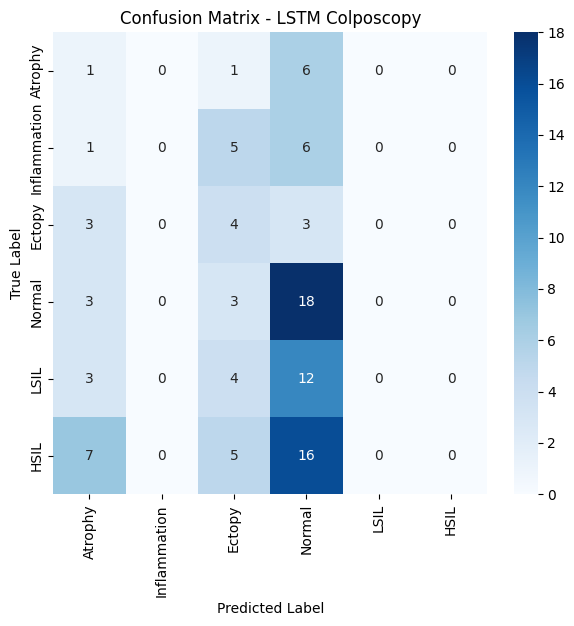

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["Atrophy","Inflammation","Ectopy","Normal","LSIL","HSIL"],
    yticklabels=["Atrophy","Inflammation","Ectopy","Normal","LSIL","HSIL"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LSTM Colposcopy")
plt.show()

In [8]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=[
        "Atrophy", "Inflammation", "Ectopy",
        "Normal", "LSIL", "HSIL"
    ]
))


              precision    recall  f1-score   support

     Atrophy       0.06      0.12      0.08         8
Inflammation       0.00      0.00      0.00        12
      Ectopy       0.18      0.40      0.25        10
      Normal       0.30      0.75      0.42        24
        LSIL       0.00      0.00      0.00        19
        HSIL       0.00      0.00      0.00        28

    accuracy                           0.23       101
   macro avg       0.09      0.21      0.13       101
weighted avg       0.09      0.23      0.13       101



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif